In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import scienceplots
from pathlib import Path
from astropy.io import fits

plt.style.use(['science', 'bright'])
plt.rcParams['figure.dpi'] = 300

def find_repo_root(start: Path = Path.cwd()) -> Path:
    for parent in [start] + list(start.parents):
        if (parent / ".git").exists():
            return parent
    return start  # fallback: cwd

repo_root = find_repo_root()
os.chdir(repo_root)

In [2]:
from src.config import PATHS

path = os.path.join(PATHS["planck"],"COM_PowerSpect_CMB_R1.10.fits")
hdul = fits.open(path)
hdul.info()

Filename: data\planck\COM_PowerSpect_CMB_R1.10.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       5   ()      
  1  LOW-ELL       1 BinTableHDU     54   48R x 4C   [I, E, E, E]   
  2  HIGH-ELL      1 BinTableHDU     58   74R x 5C   [I, I, I, E, E]   
  3  COV-MAT       1 ImageHDU        22   (74, 74)   float32   


In [3]:
low_data = hdul[1].data
high_data = hdul[2].data
cov_matrix = hdul[3].data

print(low_data.names)
print(high_data.names)
print(cov_matrix.shape)

['ELL', 'D_ELL', 'ERRUP', 'ERRDOWN']
['ELL', 'LMIN', 'LMAX', 'D_ELL', 'ERR']
(74, 74)


In [4]:
cov_matrix

array([[ 2.6496e+03, -5.9070e+01,  2.7457e+00, ..., -2.3085e-34,
        -1.4334e-35, -1.3473e-36],
       [-5.9070e+01,  3.6089e+03, -6.3296e+01, ..., -9.8235e-34,
         1.6349e-35, -2.0674e-36],
       [ 2.7457e+00, -6.3296e+01,  5.3709e+03, ..., -9.6620e-34,
         4.9160e-34,  2.0949e-35],
       ...,
       [-2.3085e-34, -9.8234e-34, -9.6619e-34, ...,  1.0238e+02,
        -1.9909e+00, -1.7812e-01],
       [-1.4335e-35,  1.6347e-35,  4.9160e-34, ..., -1.9909e+00,
         9.3567e+01, -1.3198e+00],
       [-1.3473e-36, -2.0674e-36,  2.0949e-35, ..., -1.7812e-01,
        -1.3198e+00,  8.8389e+01]], shape=(74, 74), dtype='>f4')

In [5]:
# --- LOW-ELL ---
ell_low = low_data["ELL"]
dell_low = low_data["D_ELL"]
err_low = [low_data["ERRDOWN"], low_data["ERRUP"]]  # barras de error
print(ell_low.shape, dell_low.shape, err_low[0].shape, err_low[1].shape)

# --- HIGH-ELL ---
ell_high = high_data["ELL"]
dell_high = high_data["D_ELL"]
lmin = high_data["LMIN"]
lmax = high_data["LMAX"]
err_high = high_data["ERR"]
print(ell_high.shape, dell_high.shape, lmin.shape, lmax.shape, err_high.shape)

(48,) (48,) (48,) (48,)
(74,) (74,) (74,) (74,) (74,)


In [6]:
lmin = lmin.astype(lmin.dtype.newbyteorder('='))
lmax = lmax.astype(lmax.dtype.newbyteorder('='))
dell_high = dell_high.astype(dell_high.dtype.newbyteorder('='))
ell_high = ell_high.astype(ell_high.dtype.newbyteorder('='))
cov_matrix = cov_matrix.astype(cov_matrix.dtype.newbyteorder('='))

print(ell_high)
print(lmin)
print(lmax)

[  47   78  109  140  171  202  233  264  295  326  357  388  419  450
  481  512  543  574  605  636  667  698  729  760  791  822  853  884
  915  946  977 1008 1039 1070 1101 1132 1163 1194 1225 1256 1287 1318
 1349 1380 1411 1442 1473 1504 1535 1566 1597 1628 1659 1690 1721 1752
 1783 1814 1845 1876 1907 1938 1969 2000 2031 2062 2093 2124 2155 2186
 2220 2263 2323 2419]
[  32   63   94  125  156  187  218  249  280  311  342  373  404  435
  466  497  528  559  590  621  652  683  714  745  776  807  838  869
  900  931  962  993 1024 1055 1086 1117 1148 1179 1210 1241 1272 1303
 1334 1365 1396 1427 1458 1489 1520 1551 1582 1613 1644 1675 1706 1737
 1768 1799 1830 1861 1892 1923 1954 1985 2016 2047 2078 2109 2140 2171
 2202 2239 2288 2359]
[  62   93  124  155  186  217  248  279  310  341  372  403  434  465
  496  527  558  589  620  651  682  713  744  775  806  837  868  899
  930  961  992 1023 1054 1085 1116 1147 1178 1209 1240 1271 1302 1333
 1364 1395 1426 1457 1488 1519 15

C:\Users\Julian\AppData\Local\Temp\ipykernel_5636\883585265.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


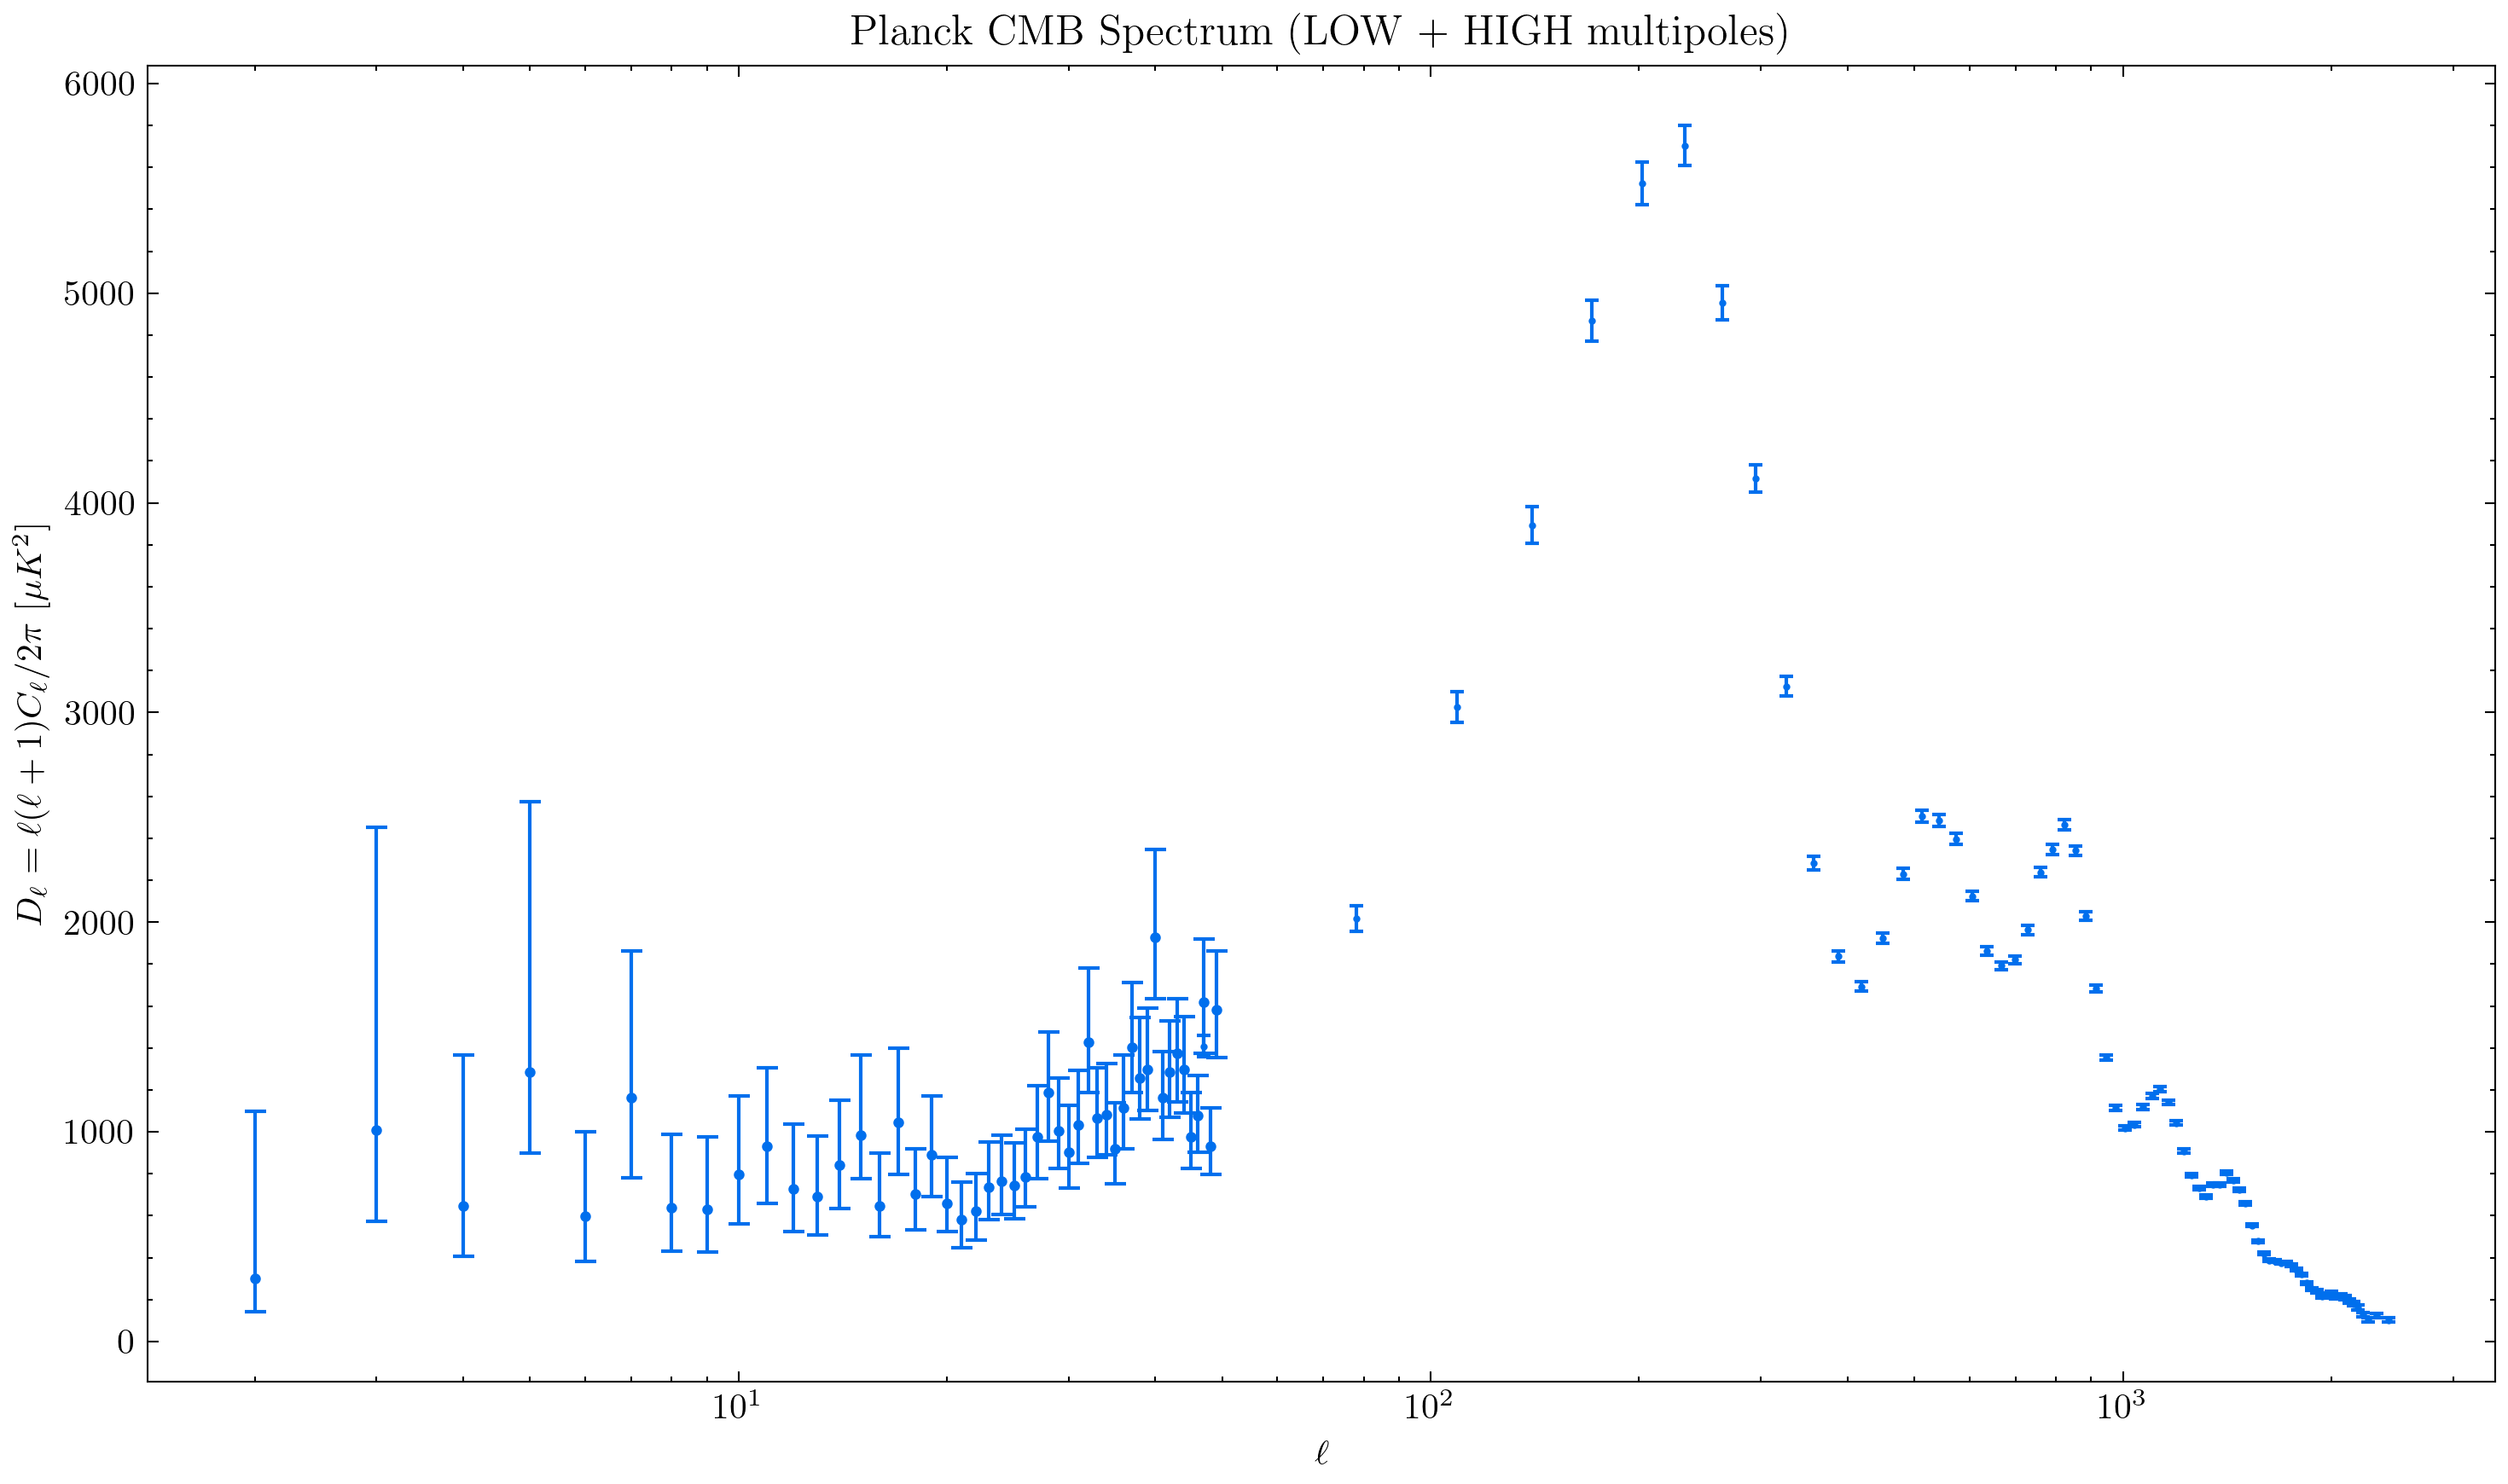

In [7]:
plt.figure(figsize=(10,6))
plt.errorbar(
    ell_low, 
    dell_low, 
    yerr=err_low, 
    fmt="o", 
    capsize=3,
    markersize=2,
    color ='#006FED'
)
plt.errorbar(
    ell_high, 
    dell_high, 
    yerr=err_high, 
    fmt=".", 
    capsize=2,
    markersize=2,
    color='#006FED'
)

plt.xscale('log')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$D_\ell = \ell(\ell+1)C_\ell/2\pi \ [\mu K^2]$")
plt.title("Planck CMB Spectrum (LOW + HIGH multipoles)")
plt.legend()
plt.tight_layout()
plt.show()

In [8]:
import torch
from src.processor import Processor

processor = Processor(type_str="TT+EE+BB+TE")
theta, D_ell = processor.load_simulations("01_all_Cls_reduced_prior_50000.pt")

lmin = lmin.astype(lmin.dtype.newbyteorder('='))
lmax = lmax.astype(lmax.dtype.newbyteorder('='))

lmin_tensor = torch.from_numpy(lmin)
lmax_tensor = torch.from_numpy(lmax)

lmin_tensor = lmin_tensor.to(torch.int32)
lmax_tensor = lmax_tensor.to(torch.int32)

print(lmin_tensor.shape, lmax_tensor.shape)
print(lmin_tensor[0], lmax_tensor[-1])
print(lmin_tensor.dtype, lmax_tensor.dtype) 

c:\Users\Julian\anaconda3\envs\sbi_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


torch.Size([74]) torch.Size([74])
tensor(32, dtype=torch.int32) tensor(2479, dtype=torch.int32)
torch.int32 torch.int32


In [9]:
D_ell = processor.select_ell(D_ell, 30, 2478)
print(D_ell[0].shape)
print(D_ell[0].dtype)

torch.Size([2448])
torch.float32


In [10]:
D_ell_binned = processor.bin_high_ell(D_ell[0], lmin_tensor, lmax_tensor)
print(D_ell_binned.shape)

torch.Size([74])


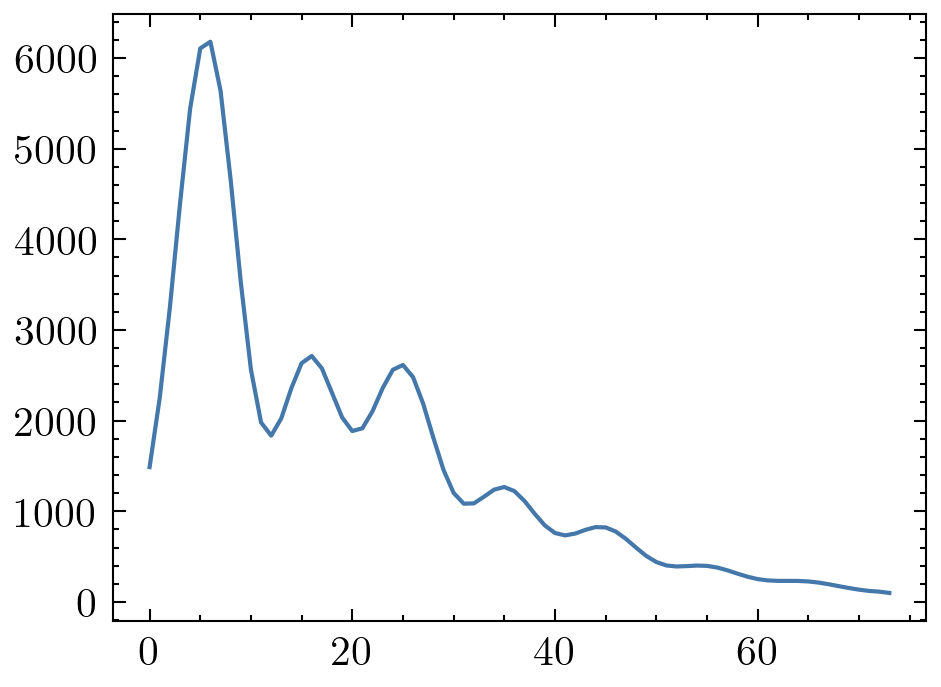

In [11]:
plt.plot(D_ell_binned)

In [12]:
cov_matrix_tensor = torch.from_numpy(cov_matrix)
print(cov_matrix_tensor.shape)
print(cov_matrix_tensor.dtype)

torch.Size([74, 74])
torch.float32


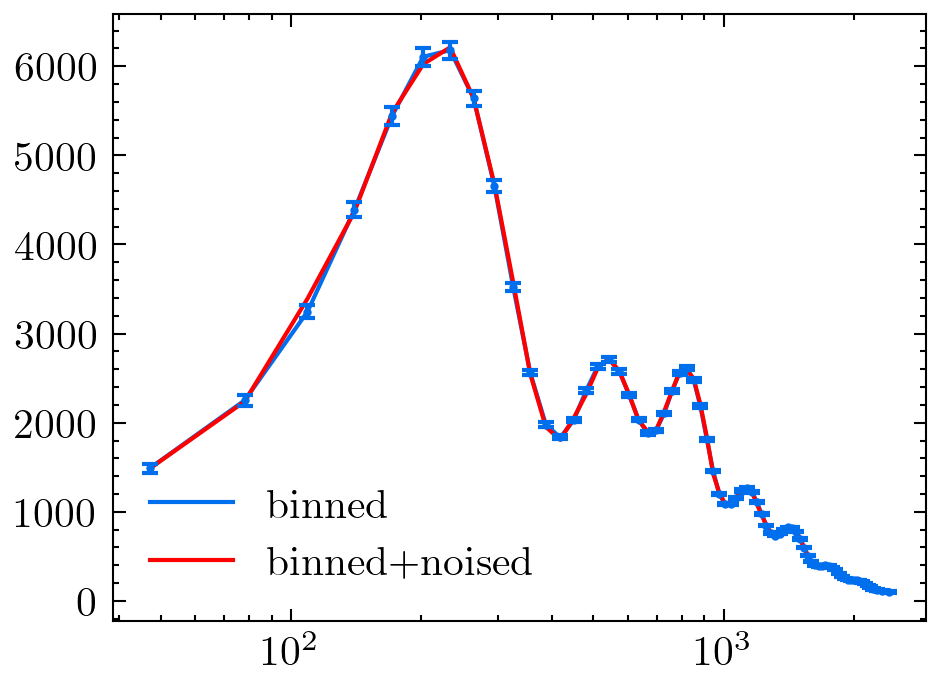

In [ ]:
D_ell_noised = processor.add_cov_noise(D_ell_binned, cov_matrix_tensor)
plt.plot(ell_high, D_ell_binned, label="binned", color='#006FED')
plt.plot(ell_high, D_ell_noised, label="binned+noised", color='#FF0000')
plt.errorbar(
    ell_high, 
    D_ell_binned, 
    yerr=err_high, 
    fmt=".", 
    capsize=2,
    markersize=2,
    color='#006FED'
)
plt.xscale('log')
plt.legend()
plt.show()


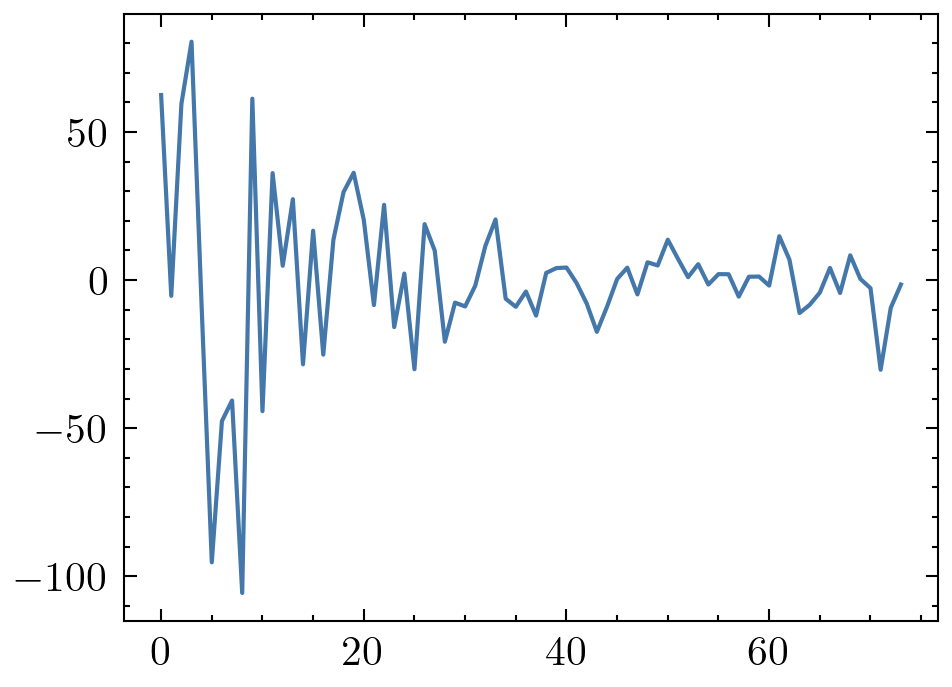

In [14]:
plt.plot(D_ell_binned-D_ell_noised)

In [12]:
from src.processor import Processor

true_parameter1 = [0.022068, 0.12029, 1.04122, 3.098, 0.9624]
simulator = processor.create_simulator()
x_obs_sim = simulator(true_parameter1)
x_obs_sim = x_obs_sim[30:2478]
x_obs_sim = processor.bin_high_ell(x_obs_sim, lmin_tensor, lmax_tensor)
print(x_obs_sim.shape)
print(x_obs_sim.dtype)

torch.Size([74])
torch.float32


In [13]:
x_obs_planck = torch.from_numpy(dell_high)
print(x_obs_planck.shape)
print(x_obs_planck.dtype)

torch.Size([74])
torch.float32


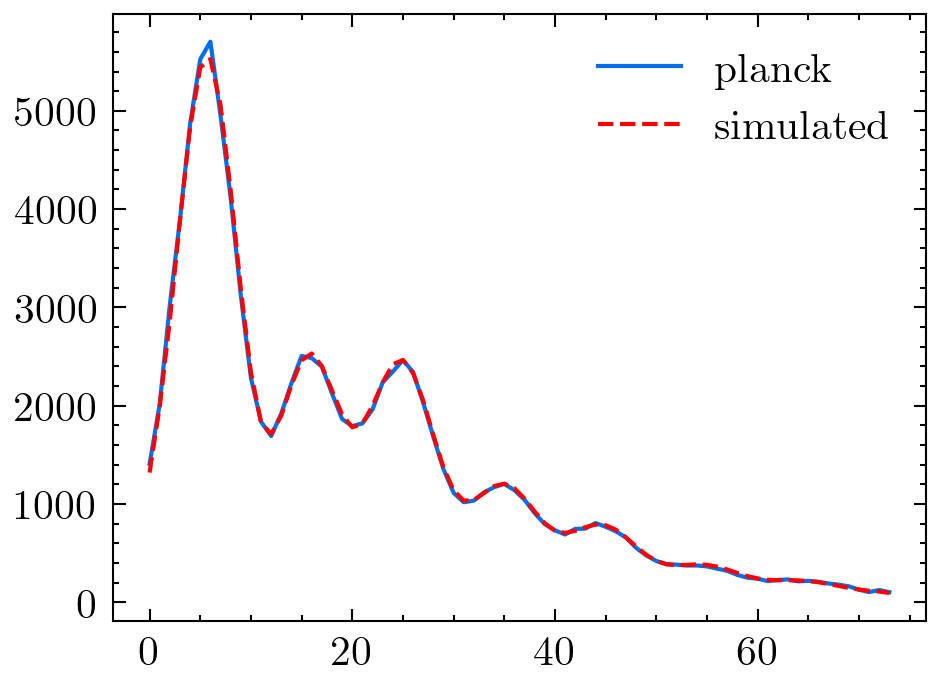

In [14]:
plt.plot(x_obs_planck, label="planck", color='#006FED')
plt.plot(x_obs_sim, label="simulated", color='#FF0000', linestyle='--')
plt.legend()
plt.show()

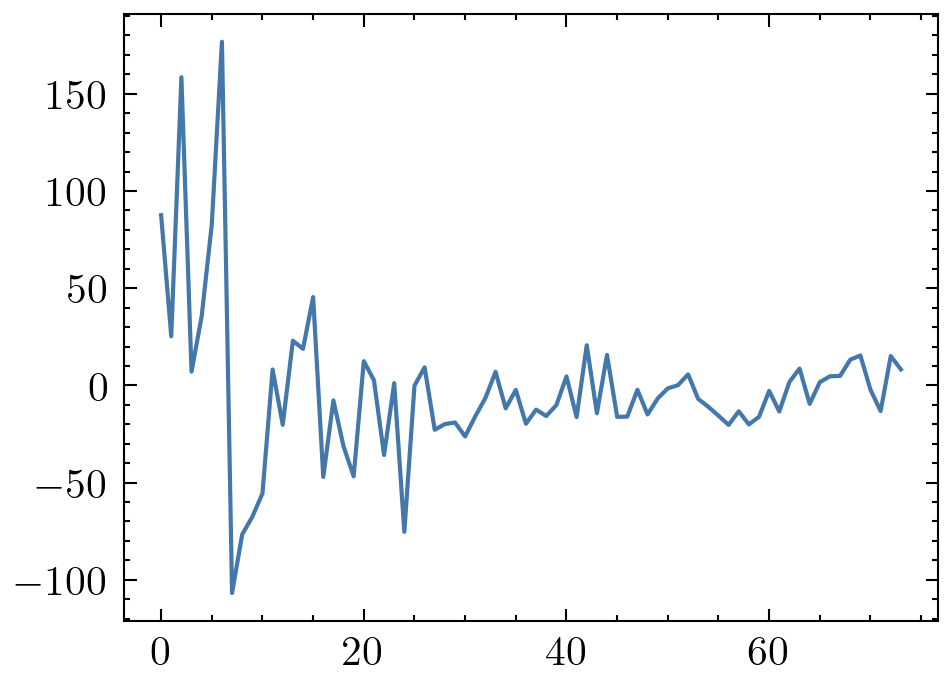

In [15]:
plt.plot(x_obs_planck-x_obs_sim)